## Variational Autoencoders

Here we show to fit data to a distribution with neural networks as well as inferring a distribution for unobserved variables. Consider some random variable $x$ with a few observations generated by a distribution $p(x)$. Often we would like to assume there are *latent variables* $z$ that generates $x$ according to some conditional probability $p(x|z)$. Specifically, we look at latent variables represented by hidden layers in a neural network, in the context of [*autoencoders*](https://en.wikipedia.org/wiki/Autoencoder), where a network is trained to reproduce the input data followed by dimensionality reduction in the hidden layers (i.e. small number of hidden layer neurons). Since the network is trained to re-produce the training data, it must have learnt a reasonably good internal representation of the data to produce a good reconstruction. In this case an internal hidden layer of the network can be seen as a good feature extractor of the data and can subsequently be used in discriminative analysis with further supervised learning of extra classifiers that take these features as inputs. This is useful for classification problems where only a small portion of data are labeled. Neural network autoencoders can be framed in a statistical perspective. In the general case, the various distributions are related by:

$$
\underbrace{p(\underline{z}\vert\underline{x})}_{posterior} = \frac{\overbrace{p(\underline{x}\vert\underline{z})}^{likelihood}\overbrace{q(\underline{z})}^{prior}}{\underbrace{p(\underline{x})}_{marginal-likelihood}}
$$

The challenge is, given $N$ data vectors $\underline{x}^{(i)}$, $n=1..N$. How do we find the likelihood $p(\underline{x}\vert\underline{z})$ and posterior distributions $p(\underline{z}\vert\underline{x})$? This problem is generally intractable unless we assume the latent variables are generated by a latent process $q_{\phi}(\underline{z})$ and restrict the likelihood and posterior to be of certain parameterised form respectively denoted by $p_{\underline{\theta}}(\underline{x}\vert\underline{z})$ and $p_{\underline{\theta}}(\underline{z}\vert\underline{x})$. For this purpose we also call the model parameters $\underline{\theta}$. These distributions need not to be of the common parameterised models such as gaussian and bernoilli distributions but can generally apply to a wide range of parameterised densities including outputs of neural networks. 

The process of fitting the distribution according given data points $\underline{x}^{(i)}$ to a parameterised posterior belongs to a family of [*variational techniques*](https://en.wikipedia.org/wiki/Variational_Bayesian_methods). This transforms the generally intractable problem of having to find the true posterior distribution $p(\underline{z}\vert\underline{x})$, to finding a parameterised approximated posterior $p_{\theta}(\underline{z}\vert\underline{x})$ that describes the observations $\underline{x}^{(i)}$. So we write:

$$
p_{\underline{\theta}}(\underline{z}\vert\underline{x}) = \frac{p_{\underline{\theta}}(\underline{x}\vert\underline{z})q_{\underline{\phi}}(\underline{z})}{p(\underline{x})}
$$

we do not have the true marginal likelihood $p(\underline{x})$ but we can aim to maximise the probability $p(\underline{x}^{(i)})$ across all example data $i=0...N$. Hopefully with this we can **derive a cost function to tune the parameters $\underline{\theta}$ with our favourite gradient ascent/descent algorithm**. Consider the log marginal likelihood of a data point $\underline{x}^{(i)}$ (see Kingma & Welling below):

$$
log[p(\underline{x}^{(i)})] = log[p(\underline{x}^{(i)})] 
\overbrace{\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})}^{=1}\\
= \sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log[p(\underline{x}^{(i)})]\\
=\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log\left[\frac{p_{\underline{\theta}}(\underline{x}^{(i)}, \underline{z})}{p_{\underline{\theta}}(\underline{z}\vert\underline{x}^{(i)})}\right]\\
=\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log\left[\frac{p_{\underline{\theta}}(\underline{x}^{(i)}, \underline{z})}{q_{\underline{\phi}}(\underline{z})}\frac{q_{\underline{\phi}}(\underline{z})}{p_{\underline{\theta}}(\underline{z}\vert\underline{x}^{(i)})}\right]\\
=\underbrace{\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log\left[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z})\right]}_{\left< log[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z})] \right>_{\underline{z}\sim q_{\underline{\phi}}(\underline{z})}} 
+ \underbrace{\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log\left[\frac{q_{\underline{\phi}}(\underline{z})}{p_{\underline{\theta}}(\underline{z}\vert\underline{x}^{(i)})}\right]}_{KL(q_{\underline{\phi}}(\underline{z})\vert \vert p_{\underline{\theta}}(\underline{z}\vert\underline{x}^{(i)}))}
$$

The first term in the expression is the expected probability of obtaining the training example $\underline{x}^{(i)}$. This term can be approximated by sampling:

$$
\sum_{\underline{z}}q_{\underline{\phi}}(\underline{z})log\left[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z})\right] \approx \frac{1}{M}\sum_{j=1}^{M}log\left[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z}_m)\right]
$$

where $\underline{z}_m$ are samples drawn from $q_{\underline{\phi}}(\underline{z})$ and we can evaluate $log[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z})]$ for each $\underline{z}_m$ through $p_{\underline{\theta}}(\underline{x}\vert \underline{z})$ (which we define ourselves). The second term is the KL-divergence of our prior $q_{\underline{\phi}}(\underline{z})$ and our parameterised posterior $p_{\underline{\theta}}(\underline{z}\vert\underline{x}^{(i)})$. The prior distribution represents what we believe as a reasonable model for $\underline{z}$ before we obseve the data. For gradient ascent to work with our models and find optimal parameters $\underline{\theta}_{opt}$, we would have to evaluate both terms and differentiate them w.r.t parameters $\underline{\theta}$.   

Now we have the cost function to fit the posterior model to data. This cost function is very general and we have not yet specified the forms of the distributions we'll be using for $q_{\underline{\phi}}(\underline{z})$, $p_{\underline{\theta}}(\underline{x}\vert\underline{z})$ and $p_{\underline{\theta}}(\underline{z}\vert\underline{x})$. As we mentioned earlier, we can specify both the likelihood and posterior distributions as neural net representations and this results in a *Variational Autoencoder (VAE)*. e.g.:

$$
p_{\underline{\theta}}(\underline{z}\vert\underline{x})\sim N(\underline{\mu}_{en}(\underline{x}),\underline{\sigma}_{en}^2(\underline{x})\dot \bf I)
=> 
\underline{z} = \underline{\mu}_{en}(\underline{x})+\underline{\sigma}_{en}(\underline{x})\epsilon, \epsilon \sim N(\underline{0}, \bf I)
$$

with $\mu_{en}(\underline{x})$ and $\underline{\sigma}_{en}^2(\underline{x})$ represented by a multilayer neural network taking $\underline{x}$ as inputs and producing mean and variance vectors $[\underline{\mu}_{en}(\underline{x}),\underline{\sigma}_{en}^2(\underline{x})]$ - the **encoder**. We also assume the network generated gaussian parameters are independent from each other with diagonal co-variance matrix. i.e. the underlying hidden variables $\underline{z}$ that geneartes our observation $\underline{x}^{(i)}$ have indepedent elements. We can also define the likelihood $p_{\underline{\theta}}(\underline{x}\vert\underline{z}) 
\sim  N(\underline{x}; \underline{\mu}_{de}(\underline{z}), \underline{\sigma}_{de}(\underline{z}))$ - a further Gaussian distribution with mean and co-variance matrix governed by the output of a multilayer neural network (the **decoder**) taking in the hidden states $\underline{z}$ as inputs. These network parameters/outputs feeds in a cost function to maximise:

$$
\frac{1}{M}\sum_{j=1}^{M}log\left[p_{\underline{\theta}}(\underline{x}^{(i)}\vert \underline{z}_m)\right]
+
KL(q_{\underline{\phi}}(\underline{z})||p_{\underline{\theta}}(\underline{z}|\underline{x}^{(i)}))
$$

We now are ready to train our VAE, running the network in forward mode:


1. feed $\underline{x}^{(i)}$ to encoder network. Encoder output gives $\underline{\mu}_{en}(\underline{x}^{(i)})$ and $\underline{\sigma}_{en}(\underline{x}^{(i)})$ 

2. we can now compute the second term, with $p_{\underline{\theta}}(\underline{z}|\underline{x}^{(i)}) = 
N(\underline{\mu}_{en}(\underline{x}^{(i)}), \underline{\sigma}_{en}(\underline{x}^{(i)})$

3. sample hidden variable $\underline{z}$ using $\underline{z} 
= \underline{\mu}_{en}(\underline{x}^{(i)})+\underline{\sigma}_{en}(\underline{x}^{(i)})\epsilon, \epsilon \sim N(\underline{0}, \bf I)$ (single sample is possibly sufficient for mini batch training)

4. we feed each of the generated hidden samples of $\underline{z}$ in the decoder network. It then computes $\underline{\mu}_{de}(\underline{z_m})$ and $\underline{\sigma}_{de}(\underline{z_m})$, giving us $p_{\underline{\theta}}(\underline{x}\vert \underline{z}_m)=N(\underline{x}; \underline{\mu}_{de}(\underline{z_m}), \underline{\sigma}_{de}(\underline{z_m}))$ - substitute in $\underline{x}=\underline{x}^{(i)}$, we can compute the first term in the cost function.

This is for a single input in the training set. In practice we group inputs into minibatches. 





## Experiment
The implementation is done in Tensorflow. The code is relatively simple and trained reasonably fast on an average CPU. I've also included parameterisation (such as number of network layers) as placeholders that can be configured at run time. I've trained the network with the [CBCL](http://cbcl.mit.edu/software-datasets/FaceData2.html) face dataset for the network to pick up the different faces.


Few things that helped the training:

- Both face/non-face data were normalised to within $[0,1]$. 
- No bias were used in the decoder to stop it from "cheating" by learning the average image on the bias values.
- RMSprop still works better for me despite [original VAE paper](https://arxiv.org/abs/1312.6114) used Adagrad. Perhaps this is because the network is slightly different and I trained it with a different dataset.
- Learning rate annealing to very small values (e.g. 0.000001) also helped the network to track down some fine features. I manually reduce the gradient update rate after every few epochs. In practice this can be automated. 
- "Elu" hidden units (see refernce below) and a sigmoids were used for the final decoder output layer. 
- "Guarded" carefully for division by zero and $log(x<=0)$ due to numerical errors. Gradient clipping.
- drop out and l1 penalty on the mean of the hidden state is used as regularisation.


An array of images generated by the trained network, using test face images as input. First column is network input. Second column is the mean output of the network as we generate a number of outputs. From column three we have some generated images given the same input in the first column:

<img src="generated_faces.png" width="800"/>


In [20]:
# Variational multilayer perceptron auto-encoder, wrapped in a class keeping all graph elements together
import numpy as np
import tensorflow as tf
import os
import webbrowser
import time
from matplotlib import cm
from matplotlib import pyplot as plt


class VDNN:
  
  def __init__(self, session, encoder_NN_size, decoder_NN_size,
                    tb_directory, nof_latent_vars,
                    init_sd = 0.001, init_mean = 0.0,
                    bias_sd = 0.0, bias_mean = 0.0,
                    epsilon = 0.000001,
                    input_noise_var = 0.01,
                    manifold_smoothness_factor = 0.0001):
    '''
    Args:
      session (tf.session object): tensorflow session passed in
      encoder_NN_size ([int]): no. units for encoder
                            e.g. [input_size, layer1_size, layer2_size, ... ]
      decoder_NN_size ([int]): no. units for decoder
                            e.g. [layer1_size, layer2_size, ...last_layer_size]
                            last_layer_size = output size = input size
      tb_directory (string): directory for tensorboard visualisation
      nof_latent_vars (int):
      init_sd (float): SD of initial random weights
      init_mean (float): mean of initial random weights
      bias_sd (float): SD of initial random bias, can be set to zero
      bias_mean (float): mean of initial random bias
      epsilon (float): small number guarding nan in computation
      input_noise_var (float): input noise variance for manifold smoothing
                                in cost function
      manifold_smoothness_factor (float): optimisation factor for manifold
                                         smoothness
    '''

    # parameter guarding against div. by 0 and log(x<=0):
    self.epsilon = epsilon
    self.input_noise_var = input_noise_var
    self.manifold_smoothness_factor = manifold_smoothness_factor

    self.one = tf.constant(1.0, dtype = tf.float32)
    self.global_step = tf.Variable(0, dtype=tf.int64)

    self.session = session #tf.InteractiveSession()
    self.tb_directory = tb_directory

    self.encoder_NN_size = encoder_NN_size
    self.decoder_NN_size = decoder_NN_size

    #setting control variables as placeholders:
    self.nof_MC_samples = tf.placeholder(tf.int32)
    self.learning_rate = tf.placeholder(tf.float32)
    self.nof_input_vectors = tf.placeholder(tf.int32)

    self.accumulated_cost = []

    # -1 size as we exclude input/output layers
    self.tf_encoder_weights = [None for n in range(len(encoder_NN_size) - 1)]
    self.tf_encoder_bias = [None for n in range(len(encoder_NN_size) - 1)]
    self.tf_decoder_weights = [None for n in range(len(decoder_NN_size) - 1)]
    self.tf_decoder_bias = [None for n in range(len(decoder_NN_size) - 1)]
    self.tf_encoder_hiddens = [None for n in range(len(encoder_NN_size) - 1)]
    self.tf_decoder_hiddens = [None for n in range(len(decoder_NN_size) - 1)]

    # extra hidden outputs (same weights + bias but with input + small noise)
    # for manifold smoothness optimisation:
    self.tf_encoder_hiddens_e = [None for n in range(len(encoder_NN_size) - 1)]

    self.tf_mean_weights = tf.Variable(tf.random_normal([encoder_NN_size[-1], nof_latent_vars], stddev=init_sd),
                                       dtype=tf.float32)

    self.tf_mean_bias = tf.Variable(tf.random_normal([1, nof_latent_vars], stddev=bias_sd, mean=bias_mean),
                                    dtype=tf.float32)

    self.tf_var_weights = tf.Variable(tf.random_normal([encoder_NN_size[-1], nof_latent_vars], stddev=init_sd),
                                      dtype=tf.float32)

    self.tf_var_bias = tf.Variable(tf.random_normal([1, nof_latent_vars], stddev=bias_sd, mean=bias_mean),
                                   dtype=tf.float32)

    # row vector as matrix with dim = nof_input_vectors x input size
    # `None` will be replaced by self.nof_input_vectors in run time:
    self.tf_inputs = tf.placeholder(tf.float32,[None, encoder_NN_size[0]])
    #input plus small noise for manifold smoothness learning:
    self.tf_inputs_e = self.tf_inputs + tf.random_normal(tf.shape(self.tf_inputs), stddev=input_noise_var,
                                                         dtype = tf.float32)

    self.keep_prob = tf.placeholder(tf.float32)

    self.encoder_weights_L2 = tf.Variable(0.0)
    self.decoder_weights_L2 = tf.Variable(0.0)

    # ad-hoc matric of variance(softmax(firing)) ~ target
    self.encoder_softmax_var = tf.Variable(0.0)
    self.decoder_softmax_var = tf.Variable(0.0)

    enN = len(encoder_NN_size)
    deN = len(decoder_NN_size)

    # *************************** Encoder **************************
    for n_in, n_out in zip(range(0,enN-1,1), range(1,enN,1)):
        self.tf_encoder_weights[n_in] = \
                tf.Variable(tf.random_normal([encoder_NN_size[n_in], encoder_NN_size[n_out]], stddev=init_sd),
                                             dtype=tf.float32)
        self.tf_encoder_bias[n_in] = \
                tf.Variable(tf.random_normal([1, encoder_NN_size[n_out]], stddev=bias_sd, mean=bias_mean),
                                             dtype=tf.float32)

        self.encoder_weights_L2 = self.encoder_weights_L2 + tf.reduce_sum(tf.multiply(self.tf_encoder_weights[n_in],
                                                                                      self.tf_encoder_weights[n_in]))

        if n_in == 0:
            self.tf_encoder_hiddens[n_in] = \
                tf.nn.dropout(tf.nn.elu(tf.matmul(self.tf_inputs, self.tf_encoder_weights[n_in])),
                              self.keep_prob)
            #input + noise, hidden units outputs
            self.tf_encoder_hiddens_e[n_in] = \
                    tf.nn.elu(tf.matmul(self.tf_inputs_e, self.tf_encoder_weights[n_in]) +\
                    self.tf_encoder_bias[n_in])
        else:
            self.tf_encoder_hiddens[n_in] = \
                    tf.nn.dropout(tf.nn.elu(tf.matmul(self.tf_encoder_hiddens[n_in-1], self.tf_encoder_weights[n_in])),
                                  self.keep_prob)
            #input + noise, hidden units outputs:
            self.tf_encoder_hiddens_e[n_in] = \
                    tf.nn.elu(tf.matmul(self.tf_encoder_hiddens_e[n_in-1], self.tf_encoder_weights[n_in]) +\
                    self.tf_encoder_bias[n_in])

        self.encoder_softmax_var = self.encoder_softmax_var + \
            tf.reduce_mean(tf.multiply(tf.nn.softmax(self.tf_encoder_hiddens[n_in]), 
                                       tf.nn.softmax(self.tf_encoder_hiddens[n_in])))

    self.encoder_softmax_var = self.encoder_softmax_var / np.float32(enN)

    # *************************** Generate z *************************
    # approx. posterior P(latent|data) is isotropic gaussian, say:
    self.tf_mean = \
        tf.matmul(self.tf_encoder_hiddens[-1], self.tf_mean_weights) #\
        #+ self.tf_mean_bias
    self.tf_var = \
        tf.exp(tf.matmul(self.tf_encoder_hiddens[-1], self.tf_var_weights))#\
        #+ self.tf_var_bias
    #mean and variance if input + noise is applied:
    self.tf_mean_e = \
        tf.matmul(self.tf_encoder_hiddens_e[-1], self.tf_mean_weights) \
        + self.tf_mean_bias
    self.tf_var_e = \
        tf.exp(tf.matmul(self.tf_encoder_hiddens_e[-1], self.tf_var_weights))\
        + self.tf_var_bias

    # tf_mean and tf_var is of [nof_input_vectors x nof_latent_vars]
    # tf_latent_samples will be of [(nof_input_vectors x nof_MC_samples) x
    #                                                       nof_latent_vars]
    # [ input1 -> MC1,
    #   input2 -> MC2,
    #   ..
    #   input1 -> MC2,
    #   input2 -> MC2,
    #   ...]
    self.tf_latent_samples = \
                   tf.tile(self.tf_mean, [self.nof_MC_samples, 1]) +\
                   tf.multiply(tf.tile(self.tf_var, [self.nof_MC_samples,1]),
                          tf.random_normal([self.nof_MC_samples*self.nof_input_vectors,
                                            nof_latent_vars]))

    # ***************************** Decoder ***************************
    for n_in, n_out in zip(range(0,deN-1,1), range(1,deN,1)):
        self.tf_decoder_weights[n_in] = \
                tf.Variable(tf.random_normal([decoder_NN_size[n_in], decoder_NN_size[n_out]],
                                              stddev=init_sd), dtype=tf.float32)
        self.tf_decoder_bias[n_in] = \
                tf.Variable(tf.random_normal([1, decoder_NN_size[n_out]], stddev=0.01,
                                              mean=0.5), dtype=tf.float32)

        self.decoder_weights_L2 = self.decoder_weights_L2 + \
            tf.reduce_sum(tf.multiply(self.tf_decoder_weights[n_in],
                                 self.tf_decoder_weights[n_in]))

        if n_in == 0:
            self.tf_decoder_hiddens[n_in] = \
                tf.nn.dropout(tf.nn.elu(tf.matmul(self.tf_latent_samples,
                                                  self.tf_decoder_weights[n_in])),
                              self.keep_prob)
        elif n_in == deN-2:
            #last layer should be sigmoid:
            self.tf_decoder_hiddens[n_in] = \
                    tf.nn.sigmoid(tf.matmul(self.tf_decoder_hiddens[n_in-1],
                                         self.tf_decoder_weights[n_in]))
        else:
            self.tf_decoder_hiddens[n_in] = \
                    tf.nn.dropout(tf.nn.elu(tf.matmul(self.tf_decoder_hiddens[n_in-1],
                                                      self.tf_decoder_weights[n_in])),
                                  self.keep_prob)

        self.decoder_softmax_var = self.decoder_softmax_var + \
           tf.reduce_mean(tf.multiply(tf.nn.softmax(self.tf_decoder_hiddens[n_in]),
                                 tf.nn.softmax(self.tf_decoder_hiddens[n_in])))

    self.decoder_softmax_var = self.decoder_softmax_var / np.float32(deN)

    self.tf_network_out = tf.reshape(self.tf_decoder_hiddens[-1],
                                     [self.nof_MC_samples, -1])
    # self.tf_decoder_hiddens[-1] looking like:
    # [[---- x'1, mc samples #1 ------],
    #  [---- x'2, mc samples #1 ------],...
    #  ...
    #  [---- x'1, mc samples #2 ------],
    #  [---- x'2, mc samples #2 ------],...
    #   ...
    #  [---- x'1, mc samples #N ------],
    #  [---- x'2, mc samples #N ------],...]
    # network output x'1 reconstructs first row of network input
    # network output x'2 reconstructs second row of network input etc..
    # reshaping it aligns all mc samples from the same input across rows

    # ************************ Cost function *****************************
    self.tf_decoder_out_mean = \
                    tf.expand_dims(tf.reduce_mean(self.tf_network_out,
                                                  reduction_indices = 0), 0)
    self.tf_decoder_out_mean_M = tf.reshape(self.tf_decoder_out_mean, 
                                            [self.nof_input_vectors, -1])
    
    self.tf_decoder_out_sub_mean = \
                    tf.reshape(self.tf_decoder_hiddens[-1],
                               [self.nof_MC_samples, -1]) - \
                    tf.tile(self.tf_decoder_out_mean, [self.nof_MC_samples, 1])
    self.tf_decoder_out_sub_mean_sqr = tf.multiply(self.tf_decoder_out_sub_mean,
                                                self.tf_decoder_out_sub_mean)
    self.tf_decoder_out_var = tf.reduce_mean(self.tf_decoder_out_sub_mean_sqr,
                                                        reduction_indices = 0)
    self.tf_decoder_out_var_M = tf.reshape(self.tf_decoder_out_var,
                                           [self.nof_input_vectors, -1])

    #MC maxi. likelihood cost log(p(x|z)) with p(x|z) = N(mu(z), sigma(z))
    self.tf_likelihood = \
      - tf.reduce_mean(
            tf.reduce_sum(0.5*tf.log(tf.maximum(self.epsilon,
                                                self.tf_decoder_out_var_M)) +
                        (tf.multiply((self.tf_inputs - self.tf_decoder_out_mean_M),
                                (self.tf_inputs - self.tf_decoder_out_mean_M)) /
                                 tf.maximum(self.epsilon,
                                            2.0*self.tf_decoder_out_var_M)),
                      reduction_indices = 1))

    # regularisation cost KL div. of approxi. posterior q(z|x(i)) and prior p(z)
    self.tf_minus_KL_qp = \
            tf.reduce_mean(
               tf.reduce_sum(tf.log(tf.maximum(self.epsilon,
                                               self.tf_var)) + self.one -
                            tf.multiply(self.tf_mean, self.tf_mean) -
                            self.tf_var,
                            reduction_indices = 1))

    # manifold smoothness cost with input noise differential:
    self.tf_mean_e_sqr = tf.reduce_sum(tf.multiply(self.tf_mean_e - self.tf_mean,
                                       self.tf_mean_e - self.tf_mean)) / \
                         tf.cast(self.nof_input_vectors, tf.float32)
    self.tf_var_e_sqr = tf.reduce_sum(tf.multiply(self.tf_var_e - self.tf_var,
                                      self.tf_var_e - self.tf_var)) / \
                        tf.cast(self.nof_input_vectors, tf.float32)
    self.tf_manifold_smoothness = self.tf_mean_e_sqr + self.tf_var_e_sqr

    # extra regularisation on weights for sparseness
    self.tf_L2_sparse = self.encoder_weights_L2 + self.decoder_weights_L2

    # encoder/decoder firing variance target cost:
    self.tf_sparse_var = \
        tf.multiply(self.encoder_softmax_var + self.decoder_softmax_var - 0.1,
               self.encoder_softmax_var + self.decoder_softmax_var - 0.1)
        
    # mean.shape = (minibatch_size, #mean_variables)
    # with no guarantee examples within a minibatch it's the same class, 
    # we sparcify everything (i.e. do not aggregate across minibatch first)!
    self.tf_sparse_mean = tf.reduce_sum(tf.abs(self.tf_mean))
    
    # combining various costs:
    self.tf_log_marginal = self.tf_minus_KL_qp + self.tf_likelihood
    # TF runs grad descent instead of ascent, so reverse it:
    self.tf_cost = - self.tf_log_marginal + self.tf_sparse_mean
    self.tf_vars = tf.trainable_variables()
    self.optimizer = \
            tf.train.RMSPropOptimizer(learning_rate=self.learning_rate,
                                      momentum = 0.1)
    self.gradvarcombo = \
                    self.optimizer.compute_gradients(self.tf_cost, self.tf_vars)
    self.gradvarcombo = [(tf.clip_by_value(grad, -10., 10.), var)
                            if grad != None else (grad, var)
                                    for grad, var in self.gradvarcombo]
    self.train_op = self.optimizer.apply_gradients(self.gradvarcombo)

    # #tensor board log directory:
    # self.summary_writer = \
    #                 tf.train.SummaryWriter(self.tb_directory, session.graph)

  def compute_output(self, inputs, nof_outputs_per_input, dp_keep_prob):
    '''
      call load variables or initialise_variables before calling this
      computes outputs with the VA given inputs.
      args:
        inputs (np.array): of size [#input examples, network input length]
                    e.g. np.array([[--- input #1 ---],
                                   [--- input #2 ---],
                                           .
                                           .
                                           .        ]
        nof_outputs_per_input (int):
                    e.g. []
      return:
        same dim. as
    '''
    res = [None for n in range(inputs.shape[0])]
    mean_ = [None for n in range(inputs.shape[0])]
    var_ = [None for n in range(inputs.shape[0])]
    for ri in range(inputs.shape[0]):
        x_i = inputs[ri,:]
        res[ri], mean_[ri], var_[ri] = \
                self.session.run([self.tf_network_out, self.tf_mean, self.tf_var],
                                 {self.nof_MC_samples : nof_outputs_per_input,
                                  self.tf_inputs : np.expand_dims(x_i, 0),
                                  self.nof_input_vectors: 1,
                                  self.keep_prob : dp_keep_prob})
    return res, mean_, var_


  def initialise_variables(self):
    self.session.run(tf.initialize_all_variables())
    #print("tf_network_out have shape = " +
    #                str(session.run([tf.shape(self.tf_network_out_sig)])[0]))

  def saveParameters(self, fileName):
    '''
    saves network weights, bias etc
    '''
    parDict = {}
    print("\nsaving variables: ")
    for v in self.tf_vars:
      parDict[v.name] = self.session.run(v)
      print(v.name + " ", end="")
    print("")
    parDict['accumulated_cost'] = self.accumulated_cost
    parDict['encoder_NN_size'] = self.encoder_NN_size
    parDict['decoder_NN_size'] = self.decoder_NN_size
    parDict['epsilon'] = self.epsilon
    parDict['manifold_smoothness_factor'] = self.manifold_smoothness_factor
    parDict['input_noise_var'] = self.input_noise_var
    np.save(fileName, parDict)

  def loadParameters(self, fileName):
    '''
    load paremeters including weighs and bias etc.
    watch dimensions of network must match what was saved.
    session.run(tf.initialize_all_variables()) will overwrite our params
    '''
    self.parametersLoaded = True
    print("\nloading variables: ")
    parDict = np.load(fileName, encoding='latin1').item()
    for v in self.tf_vars:  # all trainable variables
      print(v.name + " ", end="")
      self.session.run(v.assign(parDict[v.name]))
    self.accumulated_cost = parDict['accumulated_cost']
    self.encoder_NN_size = parDict['encoder_NN_size']
    self.decoder_NN_size = parDict['decoder_NN_size']
    self.epsilon = parDict['epsilon']
    self.manifold_smoothness_factor = parDict['manifold_smoothness_factor']
    self.input_noise_var = parDict['input_noise_var']

  def train_VA(self, example_in, no_of_epochs,
                     nof_MC_samples, learning_rate,
                     drop_out_keep_prob):
    '''
    trains the variational autoencoder,
    Args:
      example_in (np.array):
                            e.g. np.array([[--- input #1 ---],
                                           [--- input #2 ---],
                                                   .
                                                   .
                                                   .        ]
      no_of_epochs (int):
      nof_MC_samples (int):
      learning_rate (float32):

    Returns:
    sparse_mean: float
        sum(abs(mean)) of hidden state gaussian distribution - a cost for sparcifying the mean
    sparse_var: float
        sum(variance) of hidden state guassian distribution - just for observation
        not in cost function to minimise

    '''
    # loading a lot of variables here so we can put in breakpoint to observe training
    for i in range(no_of_epochs):
      evaluatedCost, minus_KL_pq, \
      likelihood_recon, manifoldSmoothCost, mean_, sparse_mean, var_, _ = \
            self.session.run([self.tf_cost, self.tf_minus_KL_qp,
                              self.tf_likelihood, self.tf_sparse_var,
                              self.tf_mean,
                              self.tf_sparse_mean,
                              self.tf_var,                              
                              self.train_op],
                             {self.tf_inputs: example_in,
                              self.nof_MC_samples: nof_MC_samples,
                              self.learning_rate: learning_rate,
                              self.nof_input_vectors: example_in.shape[0],
                              self.keep_prob: drop_out_keep_prob})
      self.accumulated_cost = self.accumulated_cost + [evaluatedCost]

    return self.accumulated_cost, minus_KL_pq, \
           likelihood_recon, manifoldSmoothCost, sparse_mean



loading variables: 
Variable:0 Variable_1:0 Variable_2:0 Variable_3:0 Variable_4:0 Variable_5:0 Variable_6:0 Variable_7:0 Variable_8:0 Variable_9:0 Variable_10:0 Variable_11:0 Variable_12:0 Variable_13:0 Variable_14:0 Variable_15:0 Variable_16:0 Variable_17:0 Variable_18:0 Variable_19:0 Variable_20:0 

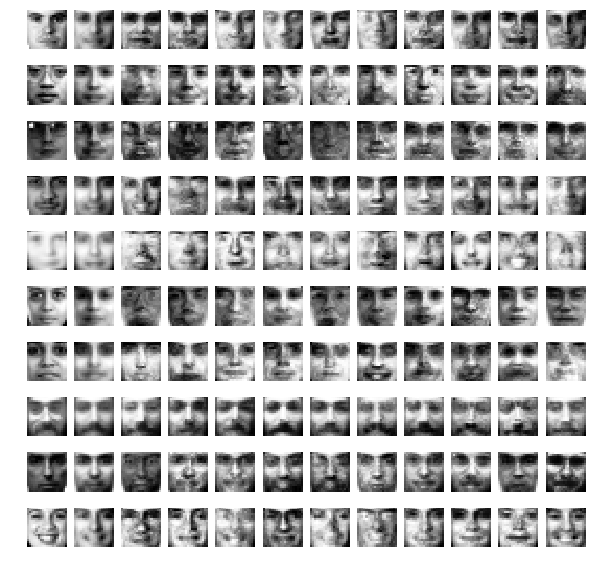

<Figure size 432x288 with 0 Axes>

In [21]:
# experiment code that uses the VDNN class derived above
# assume training images (pgm files from http://www.ai.mit.edu/courses/6.899/lectures/faces.tar.gz) are saved in ./data/CBCL/train/face
# and test images saved in ./data/CBML/test/face
tf.reset_default_graph()
IMAGE_MAX = 256  # maximum pixel value of 8 bit image


def get_data(files_path, image_max=IMAGE_MAX):
    all_images = []
    for each_filename in os.listdir(files_path):
        with open(files_path + "/" + each_filename, 'rb') as infile:
            header = infile.readline()
            header = infile.readline()
            header = infile.readline()
            image = np.fromfile(infile, dtype=np.uint8).reshape(1,361)
            image = np.squeeze(np.array(image))
            image = image/image_max
            all_images = all_images + [image]
            infile.close()

    all_images = np.array(all_images, dtype=np.float32)    
    return all_images


def vdnn_control():

    save_directory = './training/L10_3Layer_3_dropout_MB_mean/'
    file_prefix ='dropout0.8_no_bias_at_all_'
    if not os.path.exists(os.path.dirname(save_directory)):
        os.makedirs(os.path.dirname(save_directory))
    parameter_file_name = save_directory + 'README'
        
    # ********** grab CBCL face data ***********
    face_path =  './data/CBCL/train/face'
    allimages = get_data(face_path)    
    # ********** grab CBCL test face data ***********    
    face_path_test =  './data/CBCL/test/face'
    test_images = get_data(face_path_test)

    # ********************** initialise VAE **********************
    my_session = tf.Session()
    nof_latent_vars = 10
    image_size = 361
    hidden_size = 722

    encoder_NN_size = [image_size, hidden_size, hidden_size, hidden_size]
    decoder_NN_size = [nof_latent_vars, hidden_size, hidden_size, image_size]
    
    
    nof_images_in_MB = 7
    nof_epochs = 100
    init_sd = 0.01
    learning_rate = 0.0001 #annealed to v.small rate ok (input only \in [0,1])
    # 0.0003/4,
    eps = 0.0000001
    dp_keep_prob = 0.8

    with open(parameter_file_name, "w") as f:
        f.write('nof_latent_vars ' + str(nof_latent_vars) + '\n')
        f.write('image_size ' + str(image_size) + '\n')
        f.write('hidden_size ' + str(hidden_size) + '\n')
        f.write('encoder_NN_size ' + str(encoder_NN_size) + '\n')
        f.write('decoder_NN_size ' + str(decoder_NN_size) + '\n')
        f.write('nof_images_in_MB ' + str(nof_images_in_MB) + '\n')
        f.write('init_sd' + str(init_sd) + '\n')
        f.write('learning_rate ' + str(learning_rate) + '\n')
        f.write('epsilon ' + str(eps) + '\n')
        f.close()

    my_VDNN = VDNN(session = my_session,
                   encoder_NN_size = encoder_NN_size,
                   decoder_NN_size = decoder_NN_size,
                   tb_directory = './tb_log',
                   nof_latent_vars = nof_latent_vars,
                   init_sd = init_sd,
                   epsilon = eps)

    my_VDNN.initialise_variables()

    # # # # # # # # # #  *************** double plotting generated results ***************
    # my_VDNN.loadParameters(save_directory + file_prefix + '15.npy' )
    # print('loading from ' + save_directory + file_prefix)
    # nof_plots = 25
    # seed_index = 600 #100 #300 #666 #668 #674 #680 #900 very borderline
    # res = np.squeeze(
    #         np.array(my_VDNN.compute_output(inputs = testimages[seed_index:
    #                                                            seed_index + 1],
    #                                         nof_outputs_per_input = nof_plots,
    #                                         dp_keep_prob = dp_keep_prob)))
    # print('shape if result of generation = ' + str(res.shape))
    # egfig, myegAxis = plt.subplots(int(np.sqrt(nof_plots)),
    #                                int(np.sqrt(nof_plots)))
    # print("ploting some generated images:")
    # for j in range(0,int(np.sqrt(nof_plots))):
    #     for i in range(0,int(np.sqrt(nof_plots))):
    #         if j== 0 and i ==0:
    #             print('ploting original at:' + str([j,i]))
    #             myegAxis[j][i].imshow(testimages[seed_index].reshape((19,19)),
    #                                  cmap = cm.Greys_r, interpolation='nearest')
    #         else:
    #             print('ploting generated at: ' + str([j,i]))
    #             myegAxis[j][i].imshow(res[j*int(np.sqrt(nof_plots))+i].\
    #                                                         reshape((19,19)),
    #                                 cmap = cm.Greys_r, interpolation='nearest')
    #
    # print('plot twice to check randomness')
    # seed_index += 1
    # res2 = np.squeeze(
    #         np.array(my_VDNN.compute_output(inputs = testimages[seed_index:
    #                                                            seed_index + 1],
    #                                         nof_outputs_per_input = nof_plots,
    #                                         dp_keep_prob=dp_keep_prob)))
    # egfig2, myegAxis2 = plt.subplots(int(np.sqrt(nof_plots)),
    #                                int(np.sqrt(nof_plots)))
    # print("ploting some training examples, close pop up to continue.")
    # for j in range(0,int(np.sqrt(nof_plots))):
    #     for i in range(0,int(np.sqrt(nof_plots))):
    #         if j== 0 and i ==0:
    #             print('ploting original at:' + str([j,i]))
    #             myegAxis2[j][i].imshow(testimages[seed_index].reshape((19,19)),
    #                                   cmap = cm.Greys_r, interpolation='nearest')
    #         else:
    #             print('ploting generated at: ' + str([j,i]))
    #             myegAxis2[j][i].imshow(res2[j*int(np.sqrt(nof_plots))+i].\
    #                                                         reshape((19,19)),
    #
    #                                 cmap = cm.Greys_r, interpolation='nearest')
    #
    # plt.show()

    # # ## *********************** Training *******************
#     load_index = 0
    load_index = 397
    my_VDNN.loadParameters(save_directory + file_prefix + '{}.npy'.format(load_index))
    
#     for n in range(nof_epochs):  # nof_epochs):
#         for mbi in range(0, allimages.shape[0], nof_images_in_MB):
#             # plt.imshow(np.squeeze(allimages[mbi:mbi+nof_images_in_MB])\
#             #                                                 .reshape((19,19)),
#             #            cmap = cm.Greys_r, interpolation='nearest')
#             # plt.show()
#             overall_cost, KL_pq,\
#             likelihood, manifoldSmoothnes, sparse_mean =\
#                 my_VDNN.train_VA(
#                             example_in = allimages[mbi:mbi+nof_images_in_MB],
#                             no_of_epochs = 1,
#                             nof_MC_samples = 10,
#                             learning_rate = learning_rate,
#                             drop_out_keep_prob = dp_keep_prob)            
#         print('epoch ' + str(load_index + n) + ': mini batch with image indexes ' +
#                str([mbi, mbi+nof_images_in_MB]) +
#                ' and cost = ' + str(np.mean(overall_cost)) +
#                ' with KL_pq = ' + str(KL_pq) +
#                ', and likelihood (reconstruction) = ' +str(likelihood) +
#                ', and manifold smoothness cost = ' + str(manifoldSmoothnes) +
#                ', sparse mean penalty = ' + str(sparse_mean))

#         my_VDNN.saveParameters(save_directory + file_prefix + '{}'.format(load_index + n))

    # plot generated images from inputs (randomly chosen) indices
    input_indices = [338, 427, 366, 360, 383, 117, 307, 315, 380, 194]
            
    nof_outputs_per_input = 100
    nof_sample_plots = 10
    egfig, myegAxis = plt.subplots(len(input_indices), nof_sample_plots + 2, figsize=(10, 10))
    for ind, input_index in enumerate(input_indices):
        res, mean_, var_ = np.squeeze(
                np.array(my_VDNN.compute_output(inputs = allimages[input_index:input_index+1],
                                                nof_outputs_per_input = nof_outputs_per_input,
                                                dp_keep_prob = 0.8)))
        
        # ploting the input
        myegAxis[ind][0].imshow(allimages[input_index:input_index+1].reshape((19,19)), 
                                cmap = cm.Greys_r, interpolation='nearest')
        myegAxis[ind][0].set_axis_off()
        
        # ploting mean of output
        myegAxis[ind][1].imshow(np.mean(res, axis=0).reshape(19, 19),
                          cmap = cm.Greys_r, interpolation='nearest')
        myegAxis[ind][1].set_axis_off()
        
        # plot individual generated outputs
        # print("ploting some training examples, close pop up to continue.")
        for i, each_generated in enumerate(res[:nof_sample_plots]):
            myegAxis[ind][i+2].imshow(each_generated.reshape((19,19)),
                                      cmap = cm.Greys_r, interpolation='nearest')
            myegAxis[ind][i+2].set_axis_off()
    plt.axis('off')
    egfig.savefig('generated_faces.png', dpi=100,  bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.draw()


vdnn_control()


### Reference
D. P. Kingma, M. Welling, "[Auto-Encoding Variational Bayes](https://arxiv.org/abs/1312.6114)"

D-A Clevert, T. Unterthiner, S. Hochreiter, "[Fast and Accurate Deep Network Learning by Exponential Linear Units](https://arxiv.org/abs/1511.07289)"